In [53]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# First we Import the Data

# Save filespaths as variables for easier access
data_filepath = './data/data.csv'

# read the data and store data in a DataFrame titled df 
df = pd.read_csv(data_filepath, sep=";") 

# Lets print the first 5 rows of the dataset, just to get an idea of our data
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Data Dictionary

#### General Info

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown') 

#### Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


#### Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


#### Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees ( employees in the bank) - quarterly indicator (numeric)

#### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [55]:
# Select numerical columns
columns = df.columns

numerical_cols = [column_name for column_name in columns if 
                df[column_name].dtype in ['int64', 'float64']]

categorical_cols = [column_name for column_name in columns if
                    df[column_name].dtype == "object"]

print("Numerical Columns: ", len(numerical_cols))
print("Categorical Columns: ", len(categorical_cols))

Numerical Columns:  10
Categorical Columns:  11


## However, our target variable 'y' is currently categorical, lets convert to numerical

In [56]:
# Quick fix
df.y.unique()

df['y'] = df['y'].str.strip()
df['y'] = df['y'].str.lower()
df.y = df.y.replace(to_replace=['no', 'yes'], value=[0, 1])
print(df.y)


0       0
1       0
2       0
3       0
4       0
       ..
2994    0
2995    0
2996    0
2997    0
2998    0
Name: y, Length: 2999, dtype: int64


In [57]:
df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


## For Simplicity, let's initially work with just numerical columns
### Also, let's rename so we don't have to keep double-taking at the data dictionary

In [70]:
columns_to_rename = {
    'pdays':'days_since_last_contact',
    'previous': 'num_prev_contacts',
    'emp.var.rate': 'emp_var_rate',
    'cons.conf.idx': 'consumer_conf_idx',
    'cons.price.idx':'consumer_price_idx',
    'nr.employed': 'num_employed_bank'
}

#'num_employee'

for column in columns_to_rename:
    new_column_name = columns_to_rename[column]
    if column in df.columns:
        df.rename(columns={column: new_column_name}, inplace=True)

# Select numerical columns
columns = df.columns

numerical_cols = [column_name for column_name in columns if 
                df[column_name].dtype in ['int64', 'float64']]

categorical_cols = [column_name for column_name in columns if
                    df[column_name].dtype == "object"]

print("Numerical Columns: ", len(numerical_cols))
print("Categorical Columns: ", len(categorical_cols))
        
        
df = df[numerical_cols]

Numerical Columns:  11
Categorical Columns:  10


In [71]:
# Summary of the data 
print("Quick description of data")
df.describe()

Quick description of data


,age,duration,campaign,days_since_last_contact,num_prev_contacts,emp_var_rate,consumer_price_idx,consumer_conf_idx,euribor3m,num_employed_bank,y
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,39.889296,255.085028,2.526842,962.227743,0.192064,0.079093,93.584553,-40.578226,3.605769,5165.642314,0.110370
std,10.282229,256.265737,2.556995,187.599866,0.551960,1.559126,0.581162,4.594237,1.739625,74.384632,0.313403
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,316.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


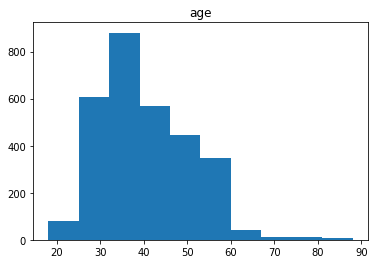

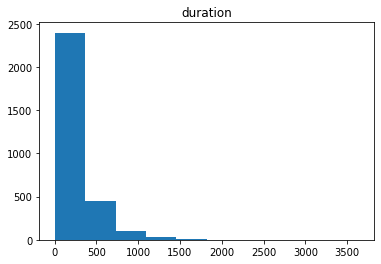

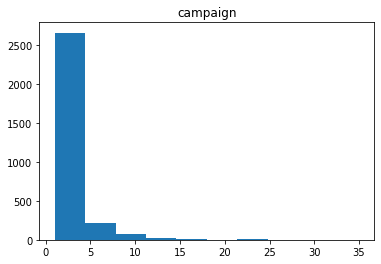

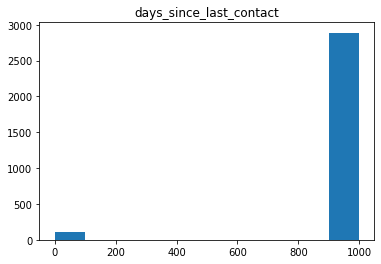

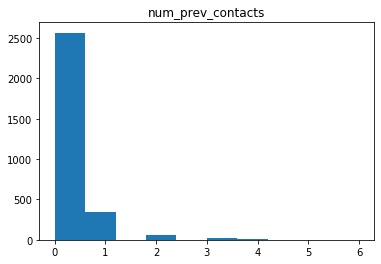

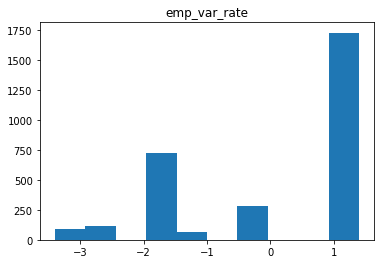

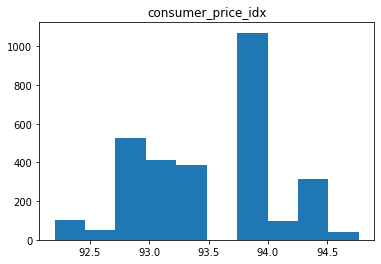

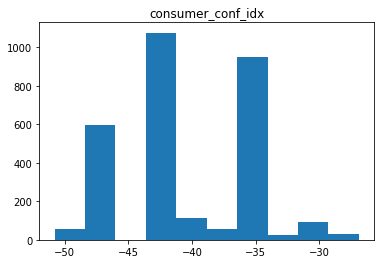

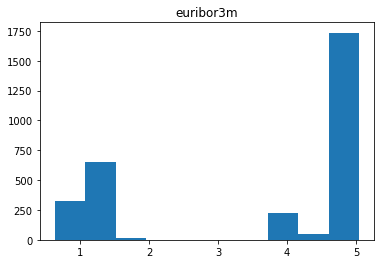

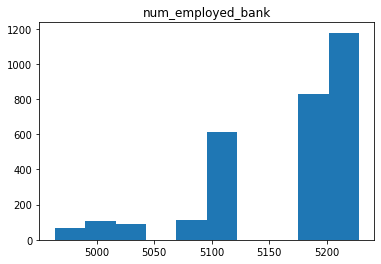

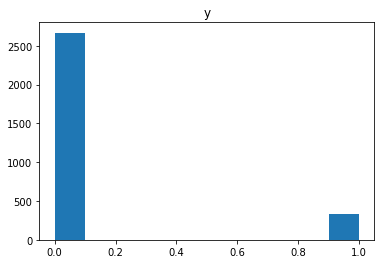

In [72]:
plt.close("all")

for column in df.columns:
    plt.figure()
    plt.title(column)
    plt.hist(df[column])



In [11]:
# Notice a lot of the values for our prediction variable y, are 0
df.y.value_counts()

0    2668
1     331
Name: y, dtype: int64

# Okay! Let's get to modeling!

In [73]:
from sklearn.model_selection import train_test_split

features = [column for column in df.columns if column != 'y']
features.remove('duration')
X = df[features]
y = df.y

train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.75, test_size=0.25,
                                                                random_state=0)


In [91]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 

# Define model. Specify a number for random_state to ensure same results each run
dtr_model = DecisionTreeRegressor(random_state=0, max_depth=3)
dtc_model = DecisionTreeClassifier(random_state=0, max_depth=3)

# Fit model
dtr_model.fit(train_X, train_y)
dtc_model.fit(train_X, train_y)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [94]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

# get predicted prices on validation data
dtr_predictions = dtr_model.predict(val_X)
dtr_accuracy = accuracy_score(val_y, np.rint(dtr_predictions))*100 # Notice the rint

dtc_predictions = dtc_model.predict(val_X)
dtc_accuracy = accuracy_score(val_y, dtc_predictions)*100

print("Decision Tree Regressor Model - Accuracy: {0:.2f}%".format(dtr_accuracy))
print("Decision Tree Classifier - Accuracy: {0:.2f}%".format(dtc_accuracy))



Decision Tree Regressor Model - Accuracy: 90.93%
Decision Tree Classifier - Accuracy: 90.93%


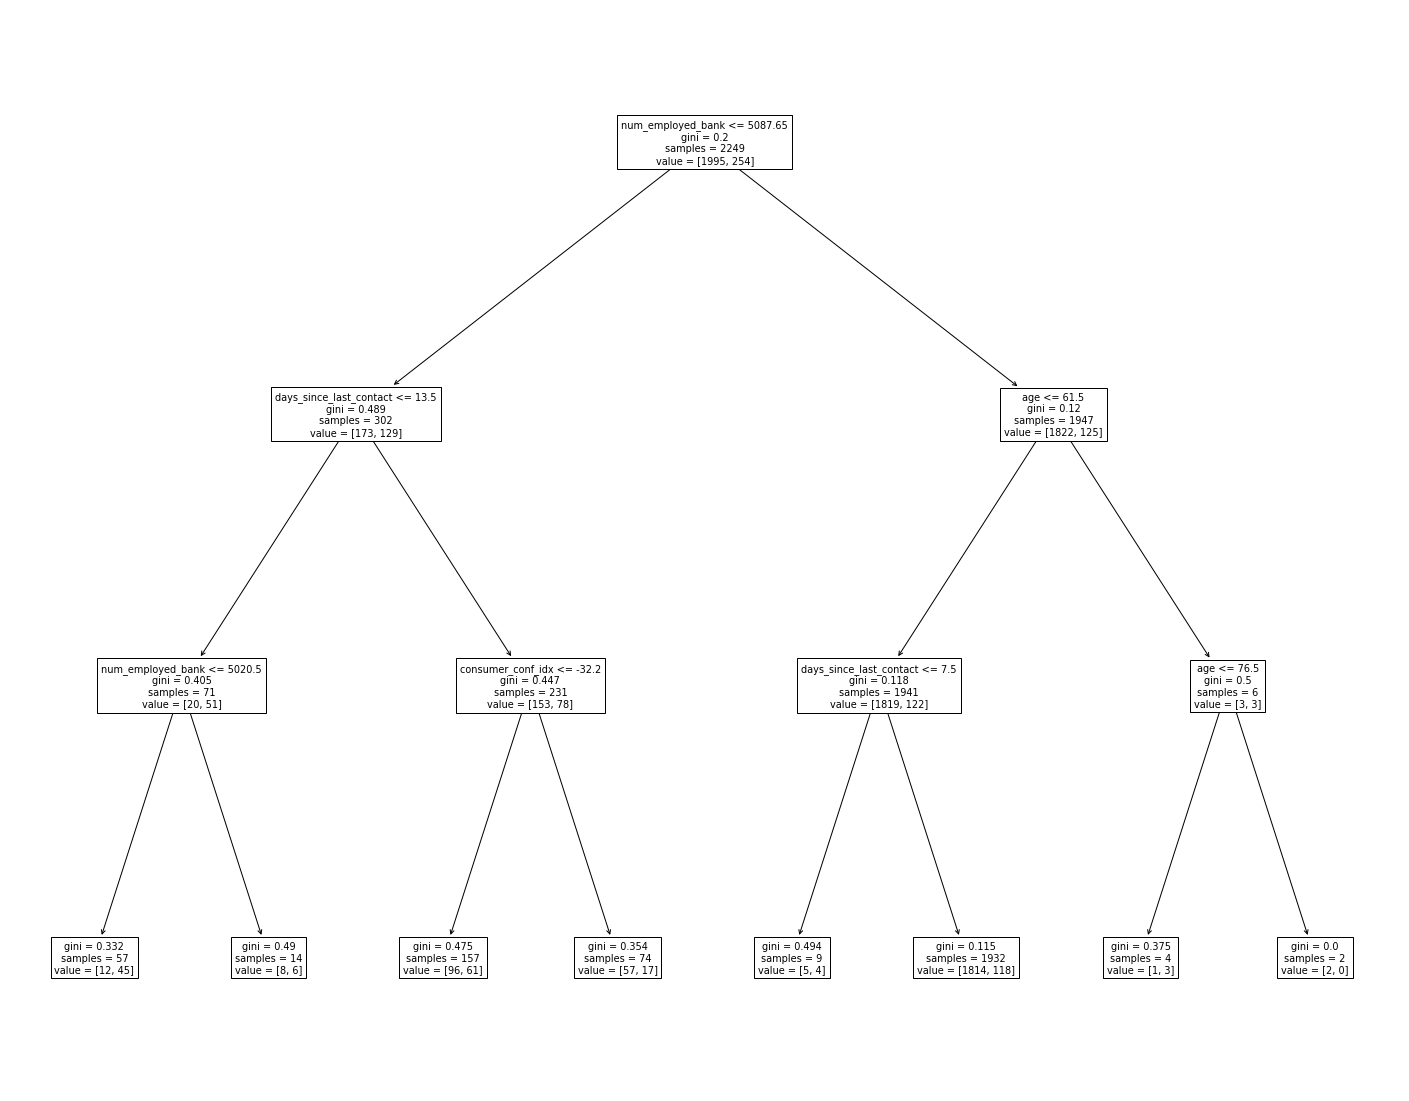

In [95]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc_model,
                  feature_names = features)

In [96]:
#df[features + ['y']].head(25)
training_data = train_X.merge(train_y, left_index=True, right_index=True) # Trimmed Data Frame: Only Features & y


In [97]:
# Starting point
training_data.y.value_counts()

0    1995
1     254
Name: y, dtype: int64

In [99]:
# Left Node: True
training_data[training_data['num_employed_bank'] <= 5087.65].y.value_counts()

0    173
1    129
Name: y, dtype: int64

$Gini Impurity = 1 - [P(1)^2 + P(0)^2]\\$
$Entropy = -P(1) \cdot log_2(P(1)) - P(0) \cdot log_2(P(0))$

In [349]:
df = pd.DataFrame({'P(1)' : pd.Series(np.arange(0.001, 1.01, .001))})
df['P(0)'] = 1 - df['P(1)']
df['gini'] = 1 - df['P(1)']**2 -  df['P(0)']**2
df['entropy'] = -1*df['P(1)']*np.log2(df['P(1)']) -  df['P(0)']*np.log2(df['P(0)'])

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


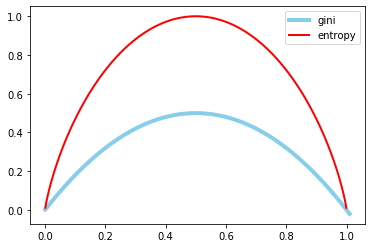

In [350]:
plt.plot( 'P(1)', 'gini', data=df, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'P(1)', 'entropy', data=df, marker='', color='red', linewidth=2)
plt.legend()

In [ ]:
def rules(clf, features, labels, node_index=0):
    """Structure of rules in a fit decision tree classifier

    Parameters
    ----------
    clf : DecisionTreeClassifier
        A tree that has already been fit.

    features, labels : lists of str
        The names of the features and labels, respectively.

    """
    node = {}
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        node['name'] = ', '.join(('{} of {}'.format(int(count), label)
                                  for count, label in count_labels))
    else:
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        node['name'] = '{} > {}'.format(feature, threshold)
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        node['children'] = [rules(clf, features, labels, right_index),
                            rules(clf, features, labels, left_index)]
    return node